In [17]:
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Normalizer
from sklearn.metrics import root_mean_squared_error, r2_score, roc_auc_score, roc_curve, auc,confusion_matrix, accuracy_score,precision_score,recall_score, f1_score
from sklearn.decomposition import PCA
import random
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sb
from keras.layers import Dense
from keras.models import Sequential
from keras.metrics import Precision, Recall, RootMeanSquaredError

In [66]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

In [2]:
column_name = ["Sex","Length","Diameter","Height","Whole weight","Shucked weight","Viscera weight","Shell Weight","Rings"]
df = pd.read_csv("abalone.data", header=None,names = column_name)

In [3]:
df["Sex"] = df["Sex"].replace({"M":0, "F":1, "I":2})
df['is_male'] = (df["Sex"] == 0).astype(int)
df['is_infant'] = (df["Sex"] == 2).astype(int)
df = df.drop(columns = ['Sex'])
cols = ['is_male','is_infant'] + [c for c in df.columns if c not in ['is_male','is_infant']]
df = df[cols]
df

C:\Users\User\AppData\Local\Temp\ipykernel_10320\4235175722.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["Sex"] = df["Sex"].replace({"M":0, "F":1, "I":2})


,is_male,is_infant,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell Weight,Rings
0,1,0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,1,0,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,0,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,1,0,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,0,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...,...
4172,0,0,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,1,0,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,1,0,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,0,0,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [4]:
age_class = []
for i in df["Rings"]:
    if i<=7:
        age_class.append(1)
    elif i>7 and i<= 10:
        age_class.append(2)
    elif i>10 and i<=15:
        age_class.append(3)
    else:
        age_class.append(4)

In [5]:
df['Age Class'] = age_class

In [6]:
df

,is_male,is_infant,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell Weight,Rings,Age Class
0,1,0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15,3
1,1,0,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7,1
2,0,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9,2
3,1,0,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10,2
4,0,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7,1
...,...,...,...,...,...,...,...,...,...,...,...
4172,0,0,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11,3
4173,1,0,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10,2
4174,1,0,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9,2
4175,0,0,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10,2


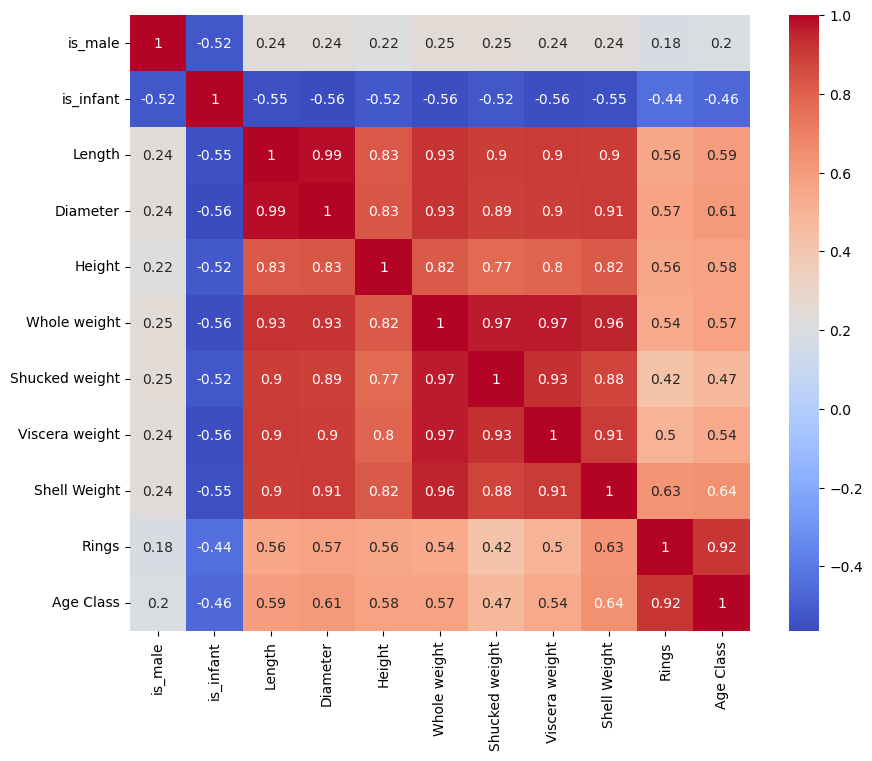

In [7]:
corr = df.corr() 
plt.figure(figsize=(10,8))
sb.heatmap(corr, annot = True, cmap='coolwarm')
plt.savefig("heatmap.png") 
plt.show()

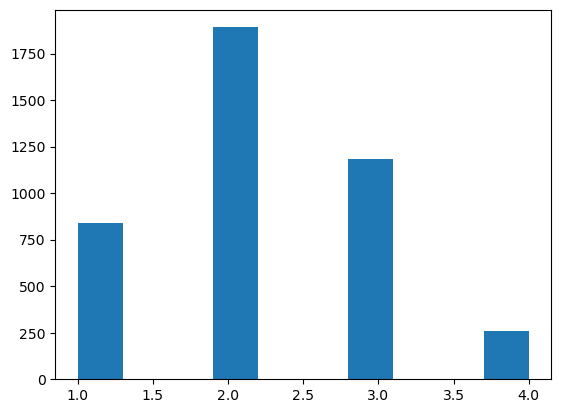

In [8]:
plt.hist(df['Age Class'])
plt.savefig("AgeClass.png") 

C:\anaconda\Lib\site-packages\pandas\plotting\_matplotlib\misc.py:100: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(boundaries_list[j])
C:\anaconda\Lib\site-packages\pandas\plotting\_matplotlib\misc.py:101: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set_ylim(boundaries_list[i])
C:\anaconda\Lib\site-packages\pandas\plotting\_matplotlib\misc.py:91: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(boundaries_list[i])


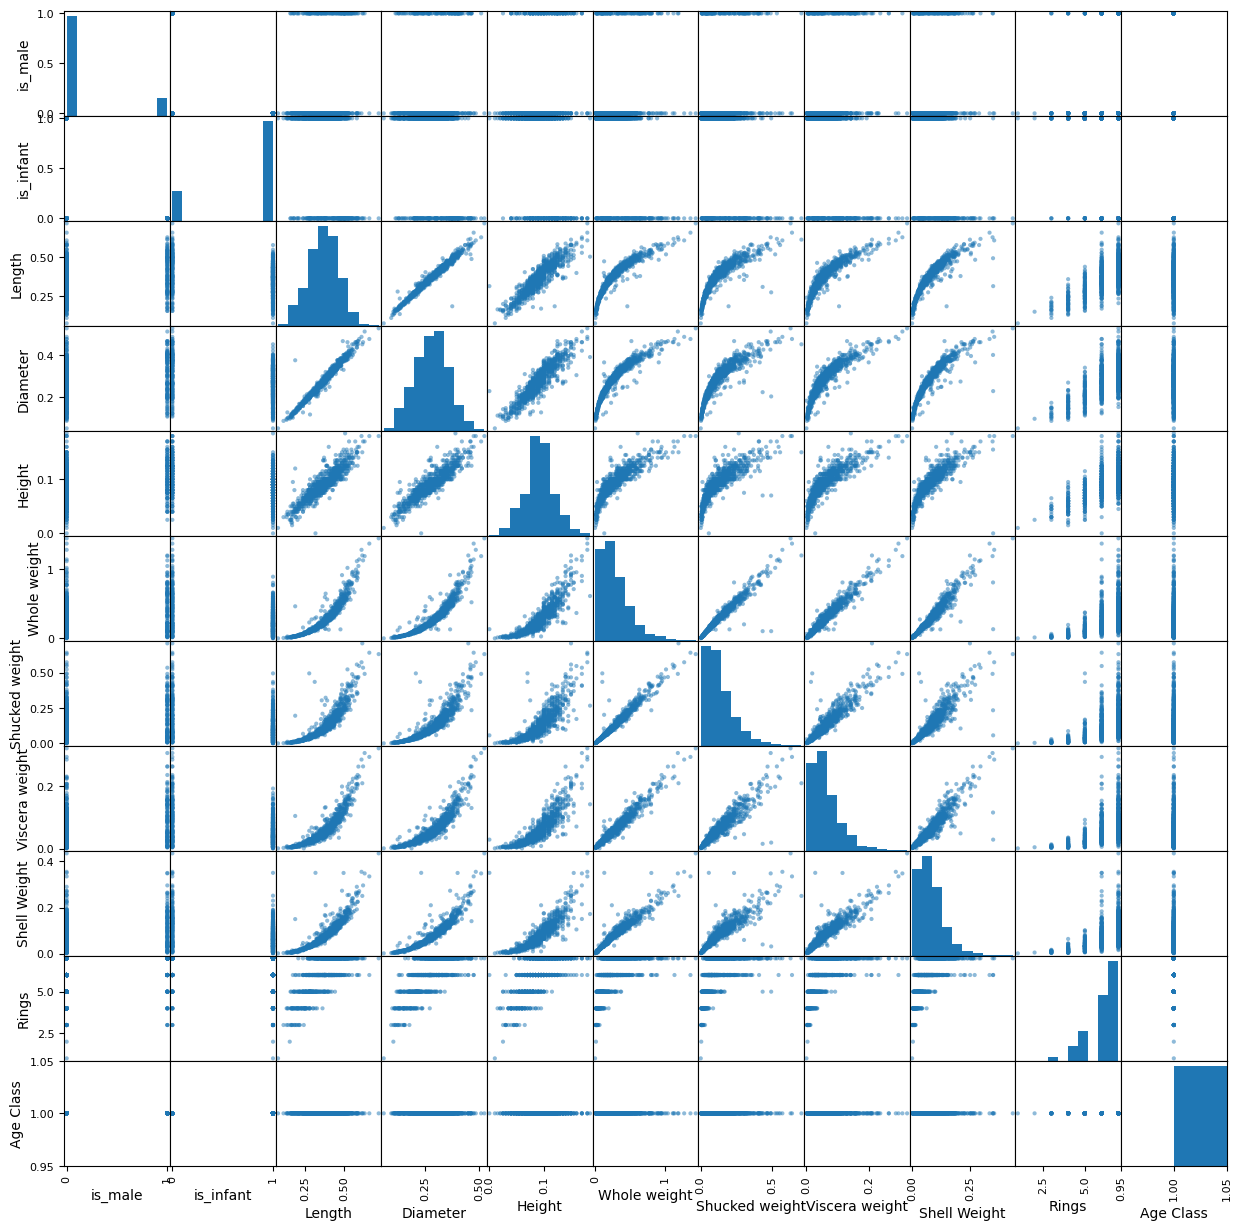

In [9]:
df_class1 = df[df['Age Class'] == 1]
pd.plotting.scatter_matrix(df_class1,figsize=(15, 15),diagonal='hist')
plt.show()

<Axes: >

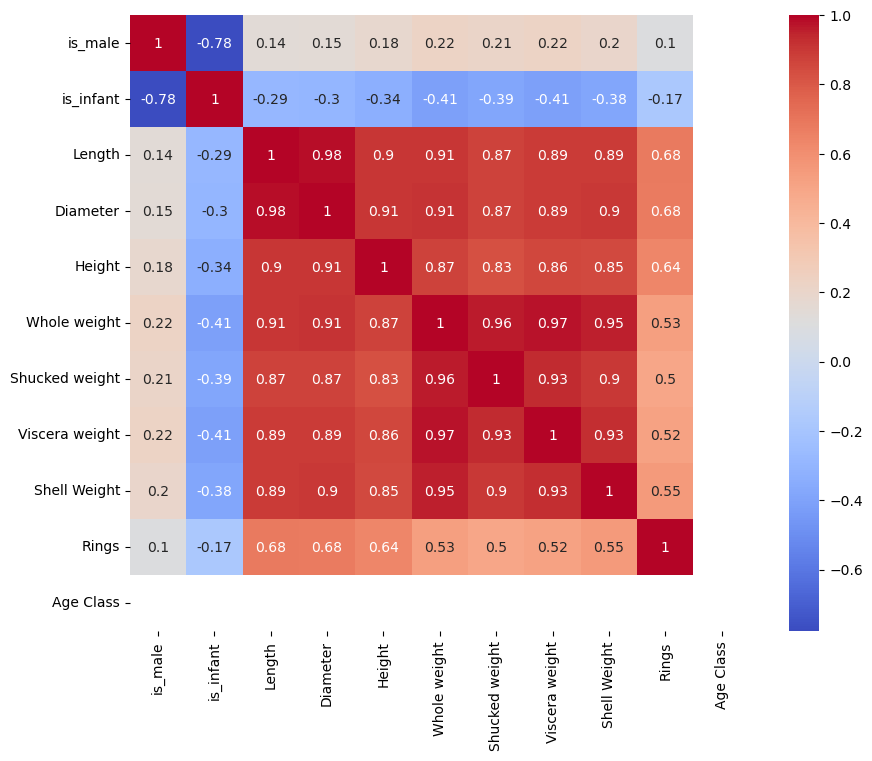

In [10]:
corr = df_class1.corr() 
plt.figure(figsize=(10,8))
sb.heatmap(corr, annot = True, cmap='coolwarm')

C:\anaconda\Lib\site-packages\pandas\plotting\_matplotlib\misc.py:100: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(boundaries_list[j])
C:\anaconda\Lib\site-packages\pandas\plotting\_matplotlib\misc.py:101: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set_ylim(boundaries_list[i])
C:\anaconda\Lib\site-packages\pandas\plotting\_matplotlib\misc.py:91: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(boundaries_list[i])


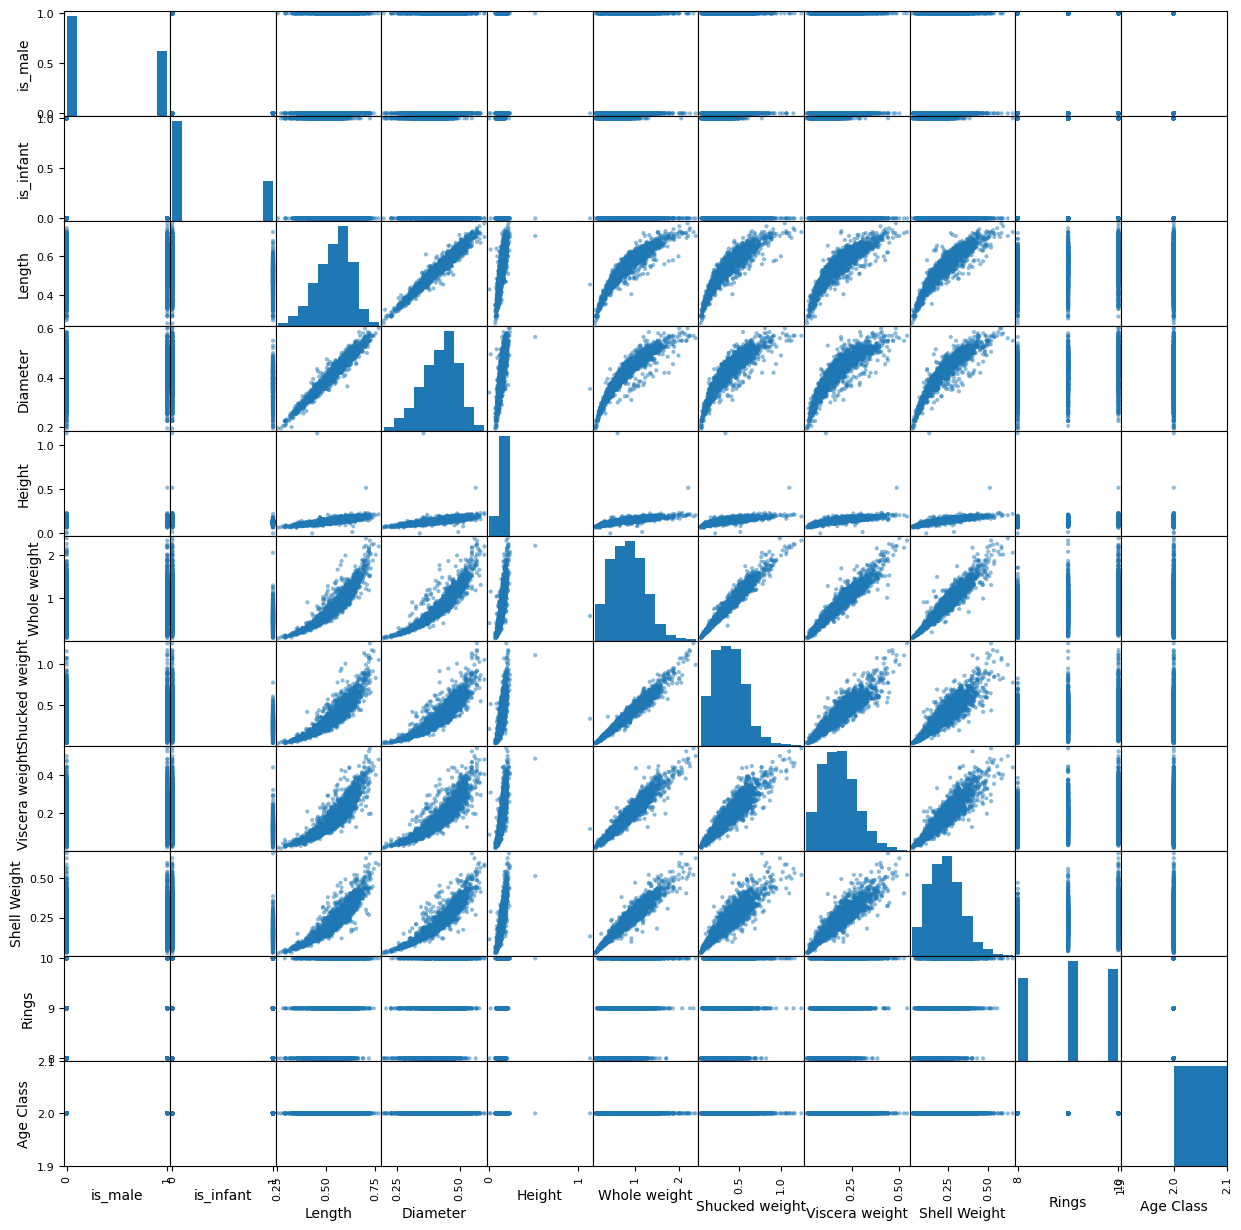

In [11]:
df_class2 = df[df['Age Class'] == 2]
pd.plotting.scatter_matrix(df_class2,figsize=(15, 15),diagonal='hist')
plt.show()

<Axes: >

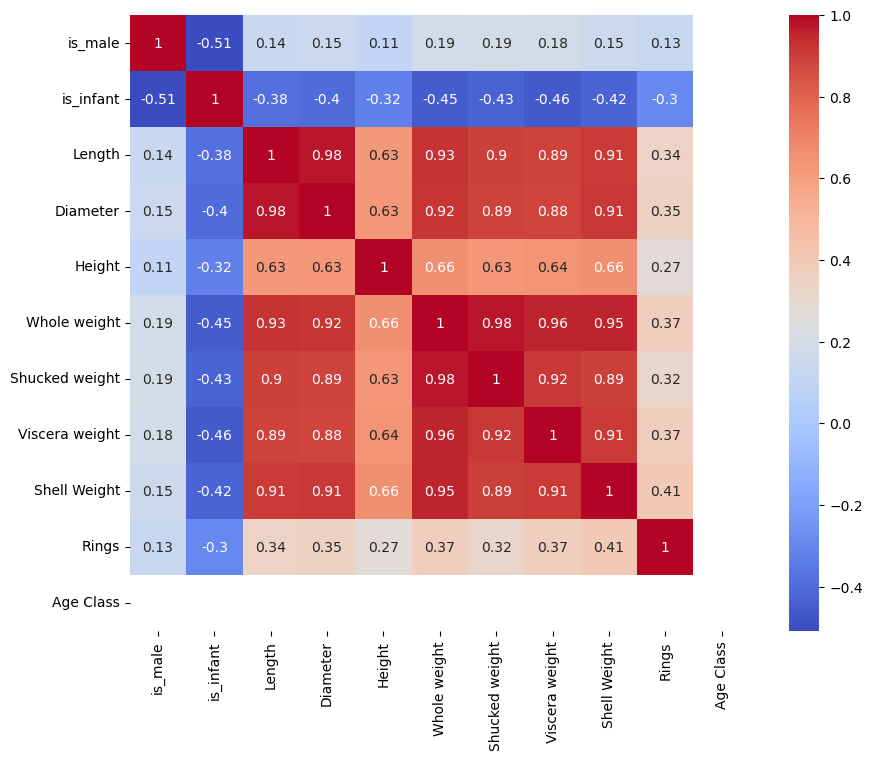

In [12]:
corr = df_class2.corr() 
plt.figure(figsize=(10,8))
sb.heatmap(corr, annot = True, cmap='coolwarm')

C:\anaconda\Lib\site-packages\pandas\plotting\_matplotlib\misc.py:100: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(boundaries_list[j])
C:\anaconda\Lib\site-packages\pandas\plotting\_matplotlib\misc.py:101: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set_ylim(boundaries_list[i])
C:\anaconda\Lib\site-packages\pandas\plotting\_matplotlib\misc.py:91: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(boundaries_list[i])


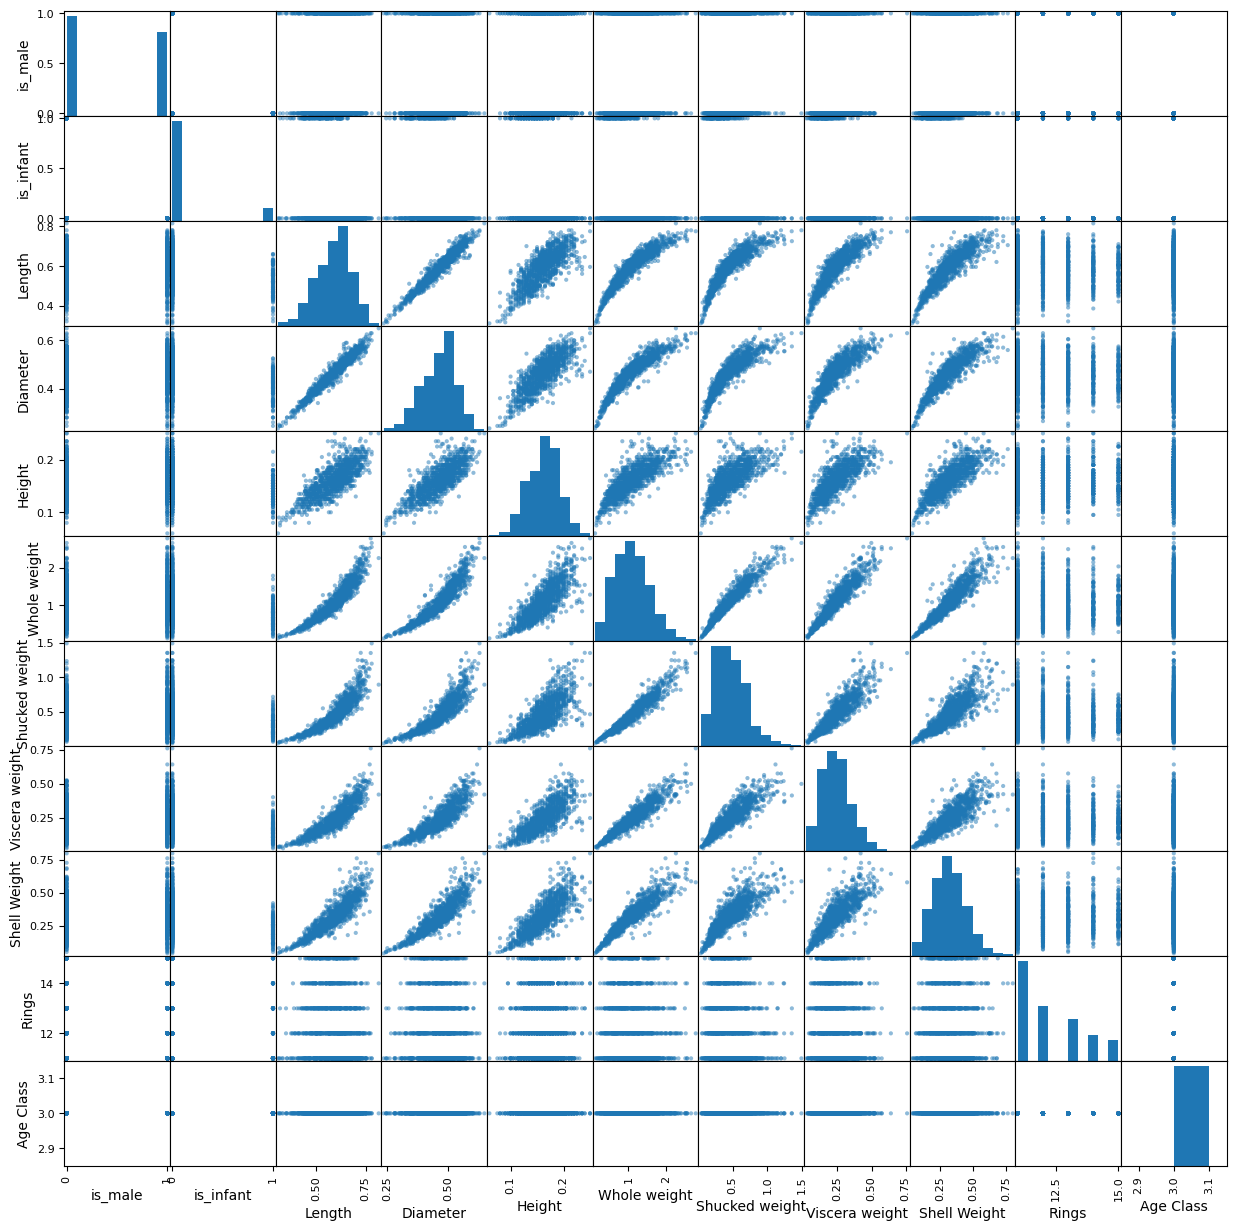

In [13]:
df_class3 = df[df['Age Class'] == 3]
pd.plotting.scatter_matrix(df_class3,figsize=(15, 15),diagonal='hist')
plt.show()

<Axes: >

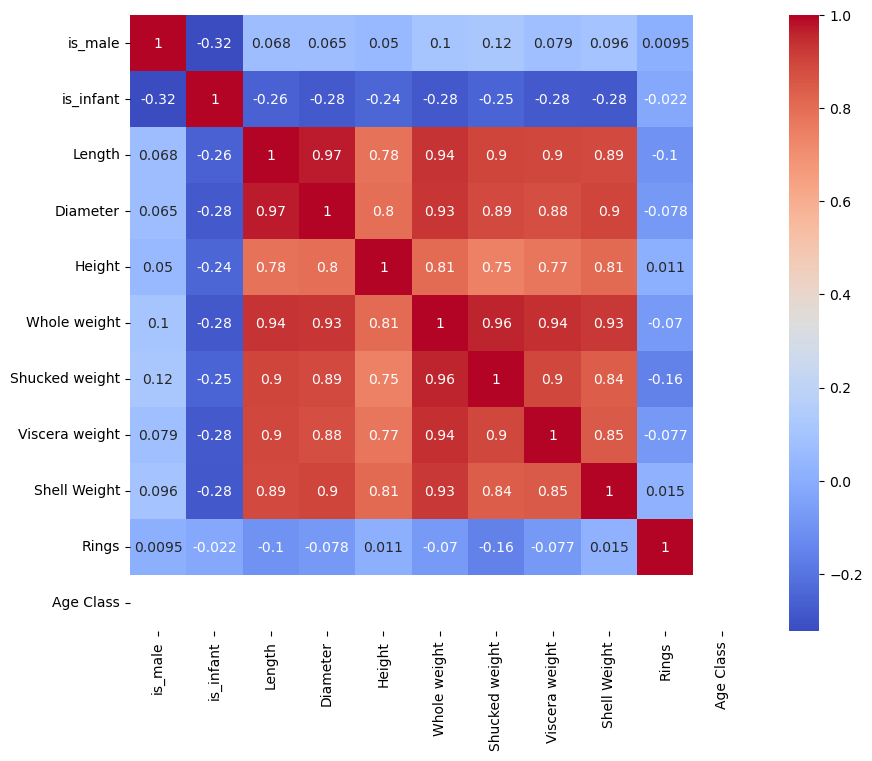

In [14]:
corr = df_class3.corr() 
plt.figure(figsize=(10,8))
sb.heatmap(corr, annot = True, cmap='coolwarm')


C:\anaconda\Lib\site-packages\pandas\plotting\_matplotlib\misc.py:100: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(boundaries_list[j])
C:\anaconda\Lib\site-packages\pandas\plotting\_matplotlib\misc.py:101: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set_ylim(boundaries_list[i])
C:\anaconda\Lib\site-packages\pandas\plotting\_matplotlib\misc.py:91: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(boundaries_list[i])


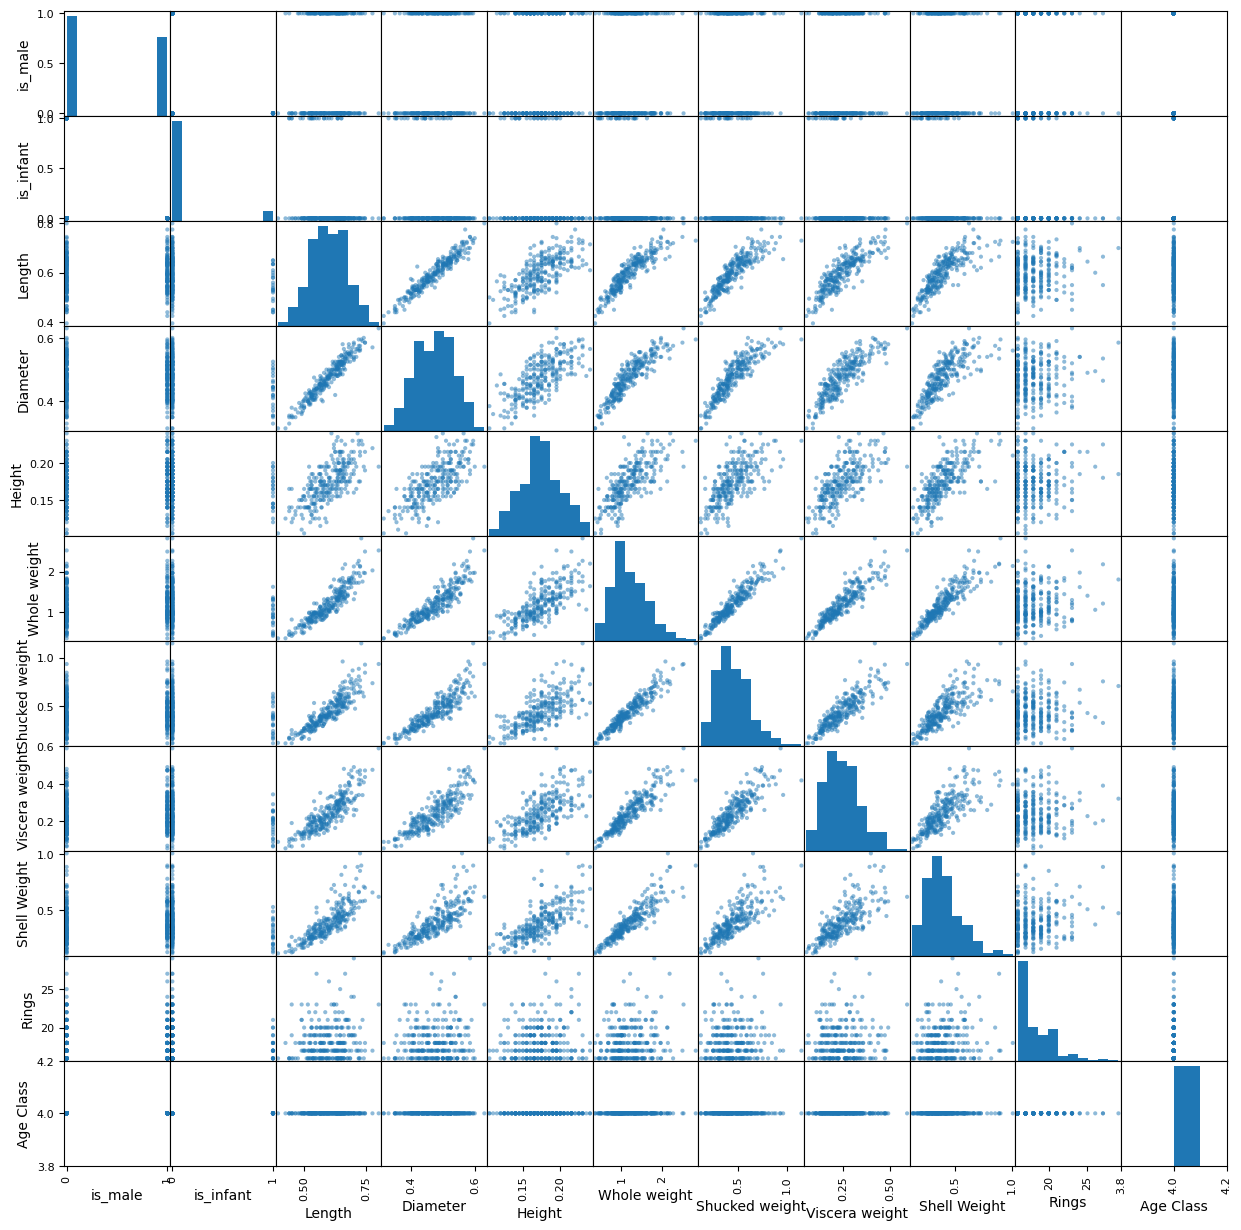

In [15]:
df_class4 = df[df['Age Class'] == 4]
pd.plotting.scatter_matrix(df_class4,figsize=(15, 15),diagonal='hist')
plt.show()

<Axes: >

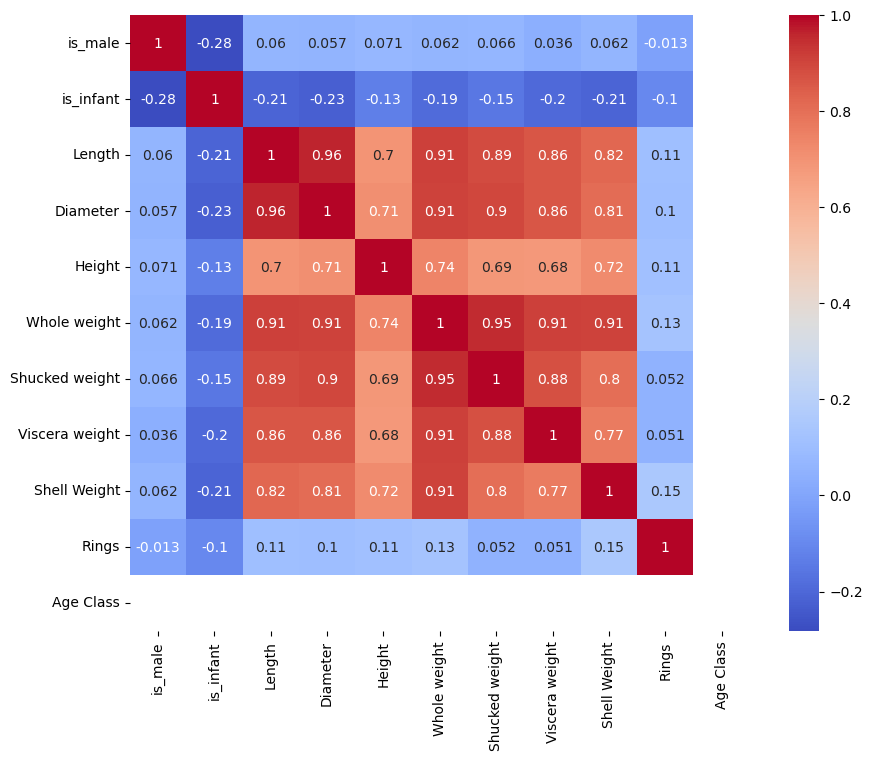

In [16]:
corr = df_class4.corr() 
plt.figure(figsize=(10,8))
sb.heatmap(corr, annot = True, cmap='coolwarm')


## PCA

In [48]:
df2 = df.drop(columns = ['Rings'])
pca = PCA(n_components = 2)
pca_result = pca.fit_transform(df2)
print(pca.explained_variance_ratio_,'explained_variance_ratio')

[0.63448209 0.18777155] explained_variance_ratio


In [50]:
pca2 = pd.DataFrame(pca_result,columns = ['pca1','pca2'])
pca2['Age Class'] = df['Age Class']
pca2

,pca1,pca2,Age Class
0,0.682946,0.126262,3
1,-1.082860,1.020679,1
2,-0.212284,-0.044595,2
3,-0.116454,0.612682,2
4,-1.611559,-0.157370,1
...,...,...,...
4172,0.708226,-0.471936,3
4173,0.138476,0.735965,2
4174,0.252905,0.791084,2
4175,0.031386,0.076167,2


C:\anaconda\Lib\site-packages\pandas\plotting\_matplotlib\misc.py:100: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(boundaries_list[j])
C:\anaconda\Lib\site-packages\pandas\plotting\_matplotlib\misc.py:101: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set_ylim(boundaries_list[i])
C:\anaconda\Lib\site-packages\pandas\plotting\_matplotlib\misc.py:91: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(boundaries_list[i])


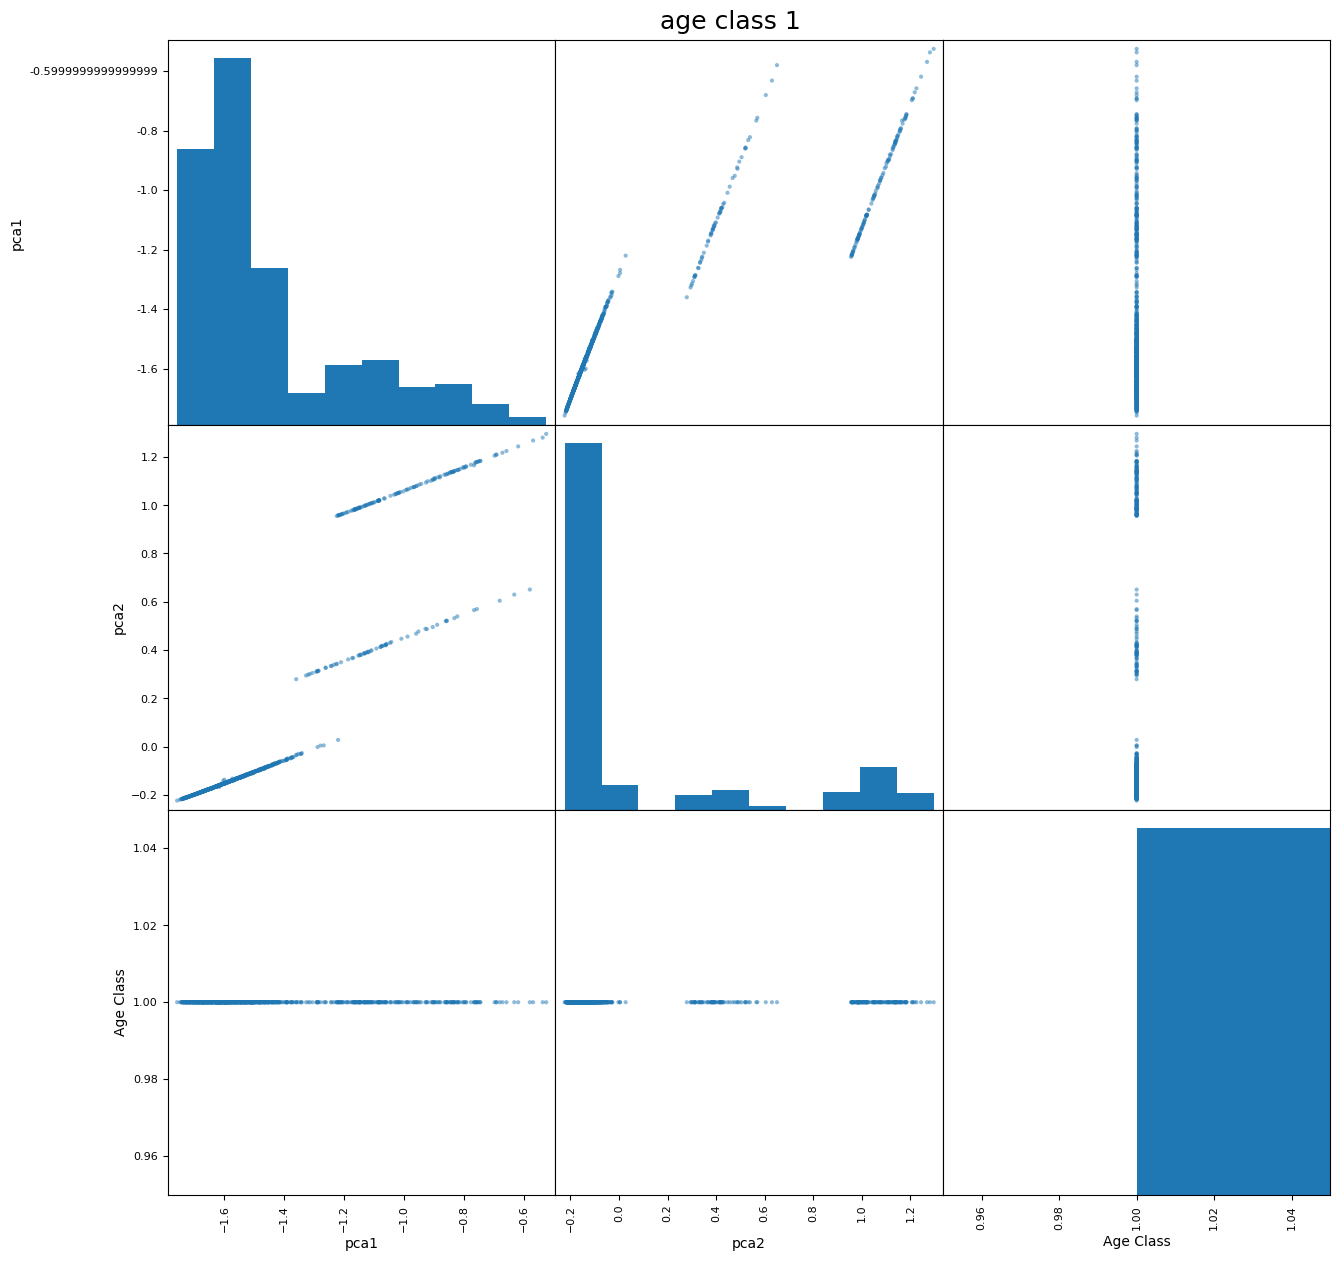

In [60]:
pd.plotting.scatter_matrix(pca2[pca2['Age Class'] == 1],figsize=(15, 15),diagonal='hist')
plt.suptitle("age class 1",fontsize=18, y=0.9)
plt.show()

C:\anaconda\Lib\site-packages\pandas\plotting\_matplotlib\misc.py:100: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(boundaries_list[j])
C:\anaconda\Lib\site-packages\pandas\plotting\_matplotlib\misc.py:101: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set_ylim(boundaries_list[i])
C:\anaconda\Lib\site-packages\pandas\plotting\_matplotlib\misc.py:91: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(boundaries_list[i])


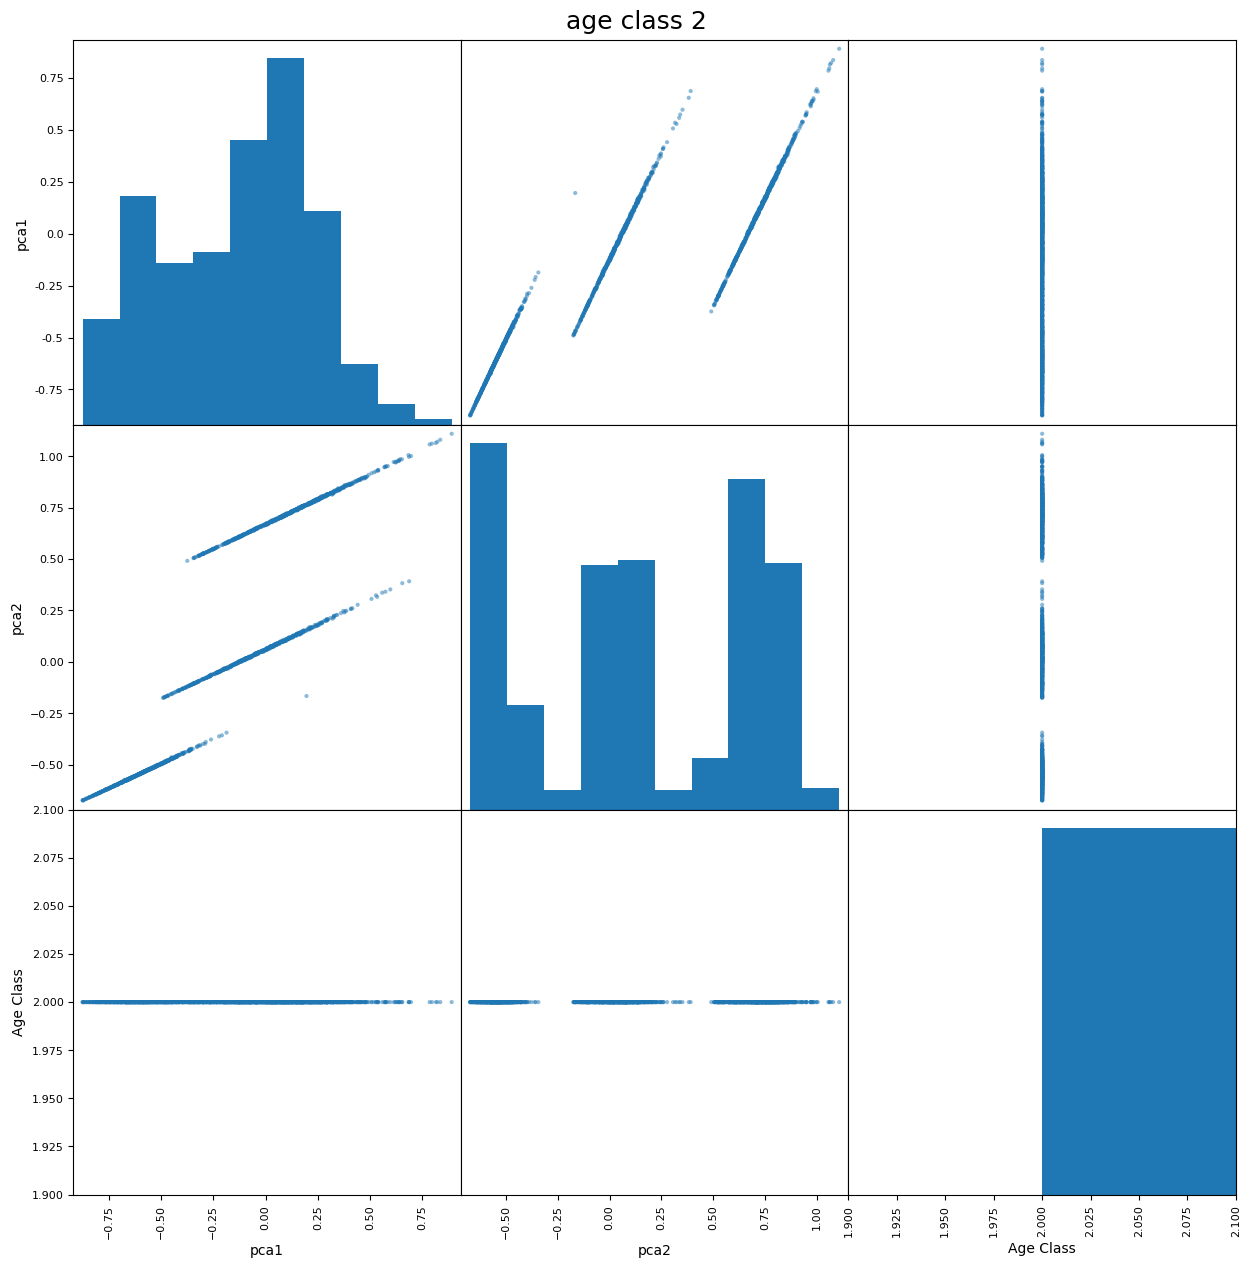

In [61]:
pd.plotting.scatter_matrix(pca2[pca2['Age Class'] == 2],figsize=(15, 15),diagonal='hist')
plt.suptitle("age class 2",fontsize=18, y=0.9)
plt.show()

C:\anaconda\Lib\site-packages\pandas\plotting\_matplotlib\misc.py:100: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(boundaries_list[j])
C:\anaconda\Lib\site-packages\pandas\plotting\_matplotlib\misc.py:101: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set_ylim(boundaries_list[i])
C:\anaconda\Lib\site-packages\pandas\plotting\_matplotlib\misc.py:91: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(boundaries_list[i])


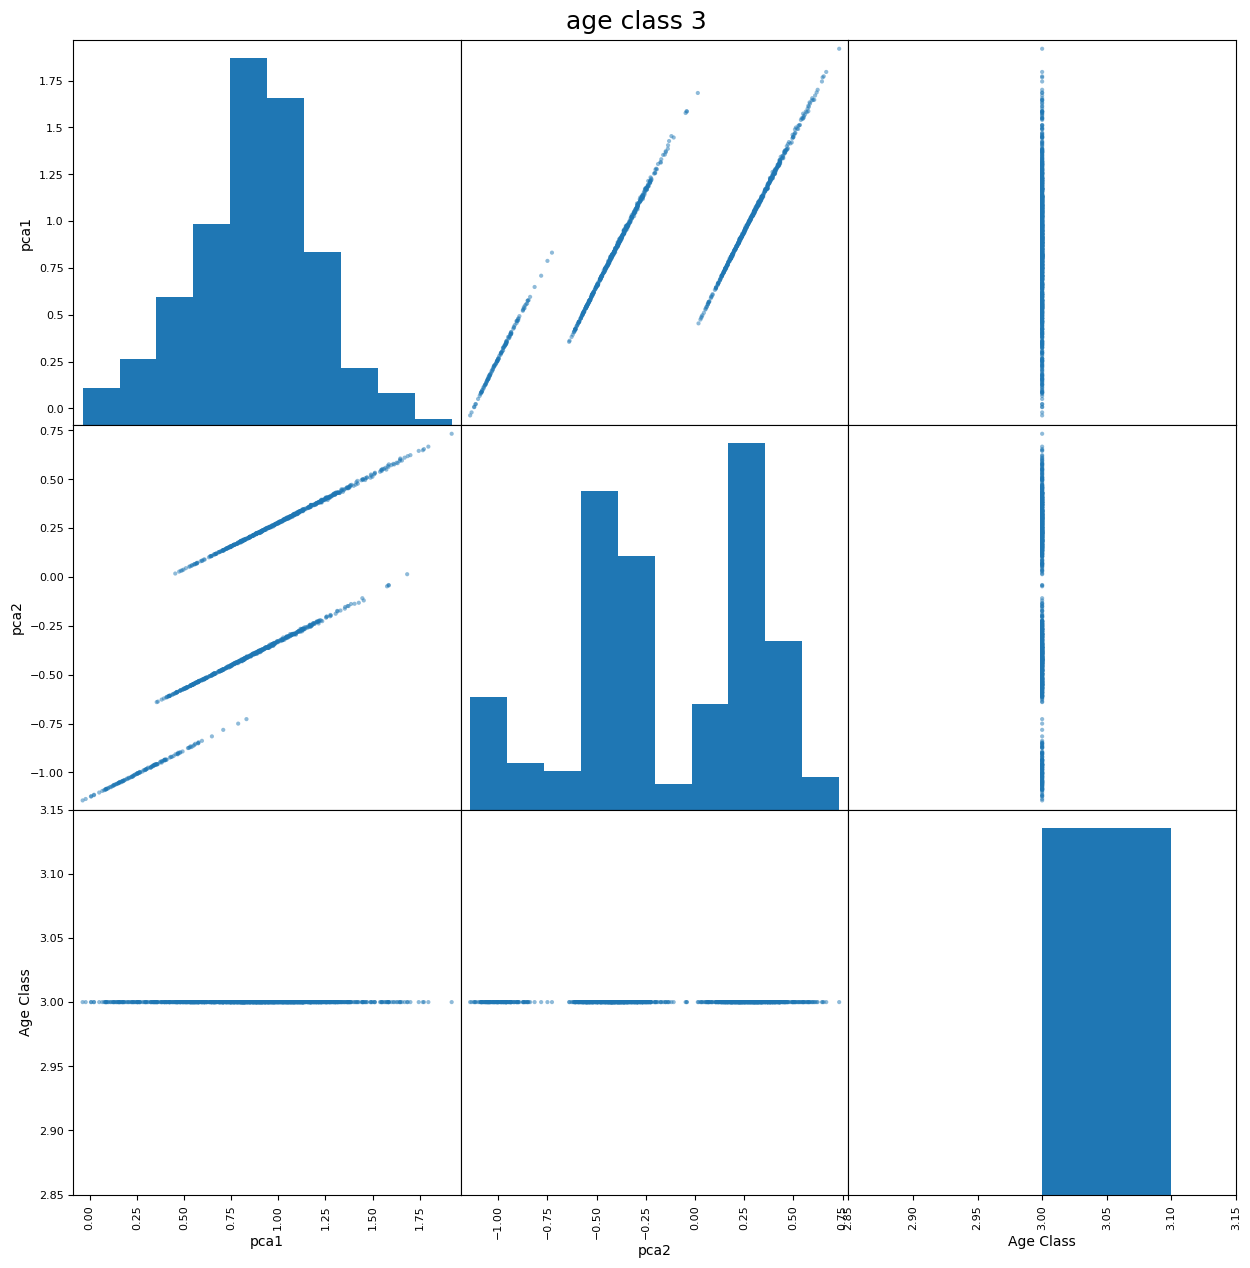

In [62]:
pd.plotting.scatter_matrix(pca2[pca2['Age Class'] == 3],figsize=(15, 15),diagonal='hist')
plt.suptitle("age class 3",fontsize=18, y=0.9)
plt.show()

C:\anaconda\Lib\site-packages\pandas\plotting\_matplotlib\misc.py:100: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(boundaries_list[j])
C:\anaconda\Lib\site-packages\pandas\plotting\_matplotlib\misc.py:101: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set_ylim(boundaries_list[i])
C:\anaconda\Lib\site-packages\pandas\plotting\_matplotlib\misc.py:91: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(boundaries_list[i])


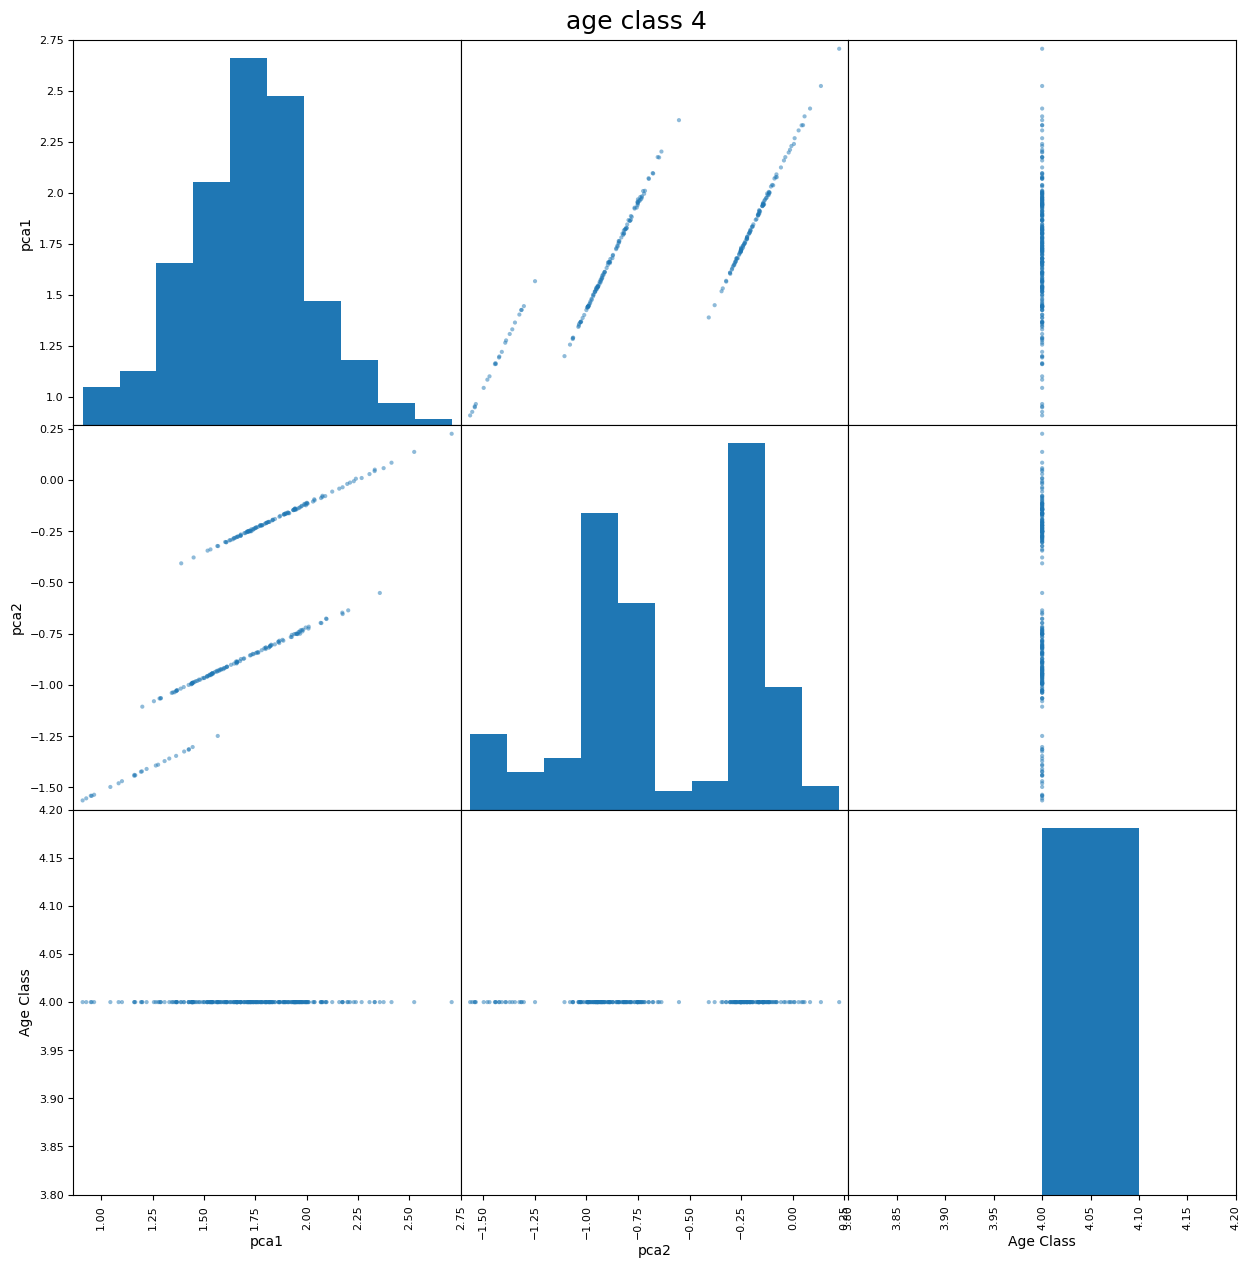

In [63]:
pd.plotting.scatter_matrix(pca2[pca2['Age Class'] == 4],figsize=(15, 15),diagonal='hist')
plt.suptitle("age class 4",fontsize=18, y=0.9)
plt.show()

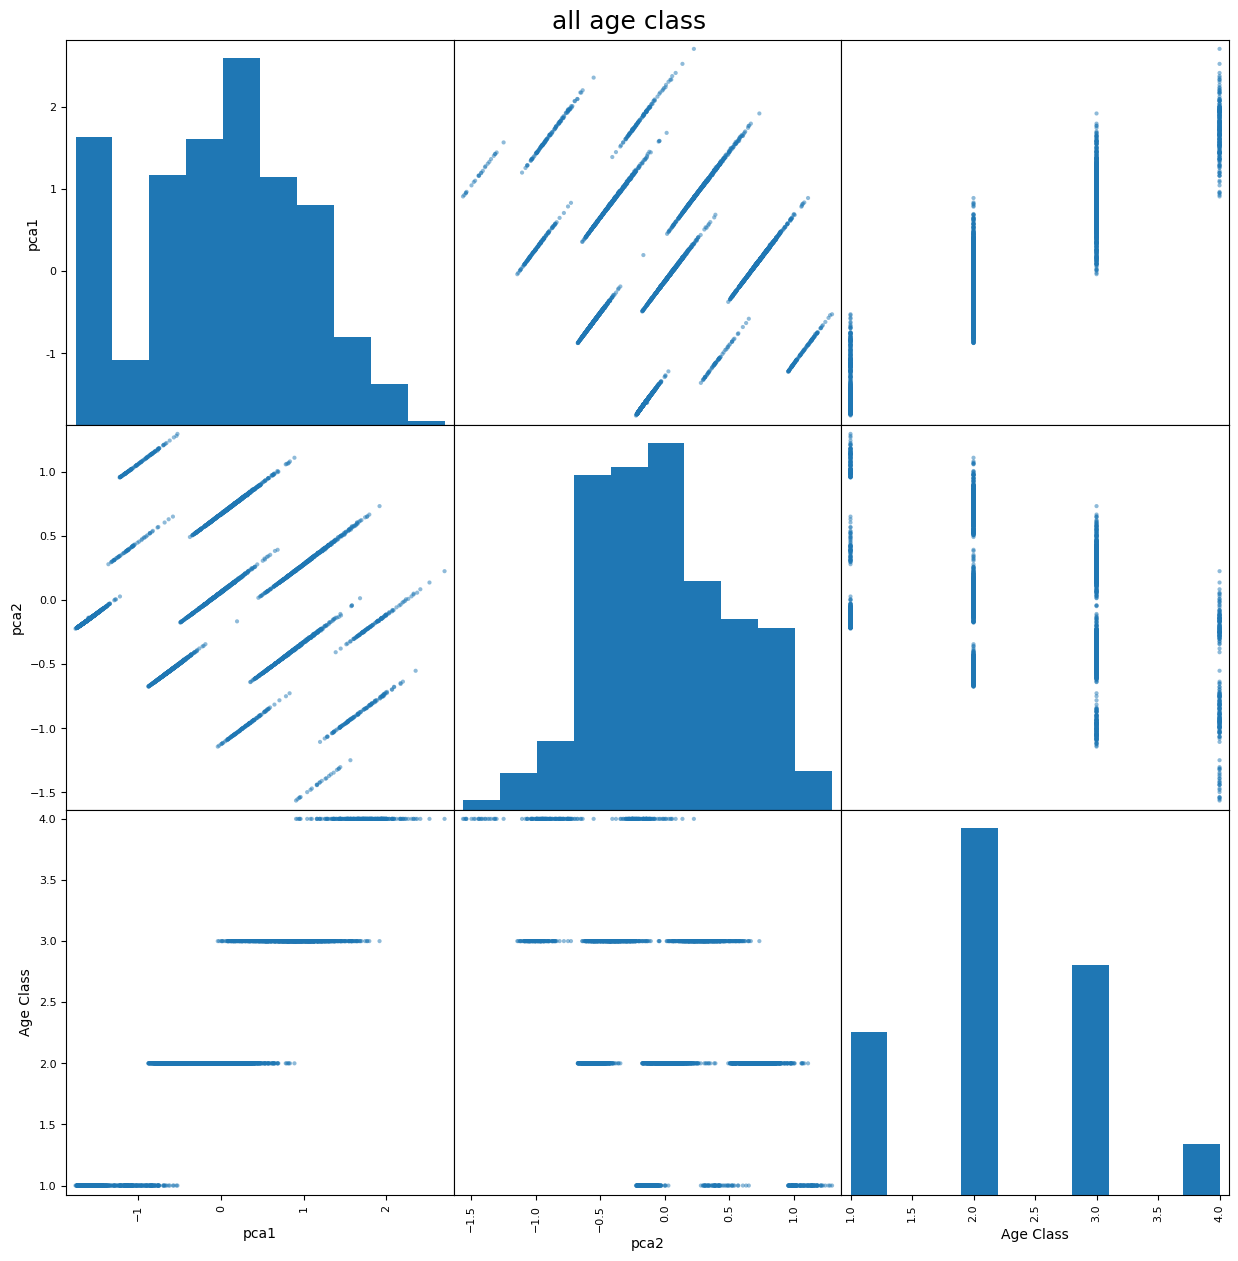

In [65]:
pd.plotting.scatter_matrix(pca2,figsize=(15, 15),diagonal='hist')
plt.suptitle("all age class",fontsize=18, y=0.9)
plt.show()

#### Note from Chris: Not optimal for 2 pca components, could try three to see if they could explain 95% of variance

## Tree

In [67]:
df2

,is_male,is_infant,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell Weight,Age Class
0,1,0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,3
1,1,0,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,1
2,0,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,2
3,1,0,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,2
4,0,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,1
...,...,...,...,...,...,...,...,...,...,...
4172,0,0,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,3
4173,1,0,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,2
4174,1,0,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,2
4175,0,0,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,2


In [68]:
def data_split(df,normalize,seed):
    data_x = df[:,0:9]
    data_y = df[:,9]

    if normalize == 1:
        transformer = Normalizer().fit(data_x)
        data_x = transformer.transform(data_x)

    x_train,x_test,y_train,y_test = train_test_split(data_x,data_y, test_size = 0.4, random_state = seed, stratify = y)

    return x_train,x_test,y_train,y_test

In [69]:
def model_selection(x_train,x_test,y_train,y_test, modeltype, hidden, learn_rate, solver, crit, depth, leaf):
    if modeltype ==0:#nn
        model = MLPClassifier(hidden_layer_sizes=(hidden,), random_state=run_num, max_iter=100,solver=solver, learning_rate_init=learn_rate)
    elif modeltype == 1:#tree
        model = DecisionTreeClassifier( 
            criterion = crit, random_state = 100, 
            max_depth = depth, min_samples_leaf = leaf) 

    model.fit(x_train, y_train)

    y_pred_test = model.predict(x_test)
    y_pred_train = model.predict(x_train) 
    if problem == 'classifification': 
        perf_test = accuracy_score(y_pred_test, y_test) 
        perf_train = accuracy_score(y_pred_train, y_train) 
        cm = confusion_matrix(y_pred_test, y_test) 
        #print(cm, 'is confusion matrix')
        #auc = roc_auc_score(y_pred, y_test, average=None) 

    return perf_test, model